In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [72]:
#Loading the dataset
# X = nasal length of the Kangaroos in mm 
# Y = nasal width of the Kangaroos in mm

df_kangaroo = pd.read_csv('~/IMT_574/Week2/Homework/kangaroos_nasal_dimension_data.csv')
data_for_model_kangaroo = df_kangaroo.copy()

In [73]:
data_for_model_kangaroo = data_for_model_kangaroo.rename(columns={'X': 'nasal_length', 'Y': 'nasal_width'})
data_for_model_kangaroo.head()

,nasal_length,nasal_width
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


In [74]:
#Setting regressor and outcome vars
X = data_for_model_kangaroo.nasal_length
Y = data_for_model_kangaroo.nasal_width
X = sm.add_constant(1)

In [75]:

import numpy as np
import matplotlib.pyplot as plt
 
def mse(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.01, 
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    for i in range(iterations):
         
        y_predicted = (current_weight * x) + current_bias
         
        current_cost = mse(y, y_predicted)
 
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
     

Iteration 1: Cost 31261.68134444445, Weight         2443.0534977777784, Bias 3.5181111111111107
Iteration 2: Cost 2869483505844.1826, Weight         -23491872.236402553, Bias -33578.7686274489
Iteration 3: Cost 2.653987721965396e+20, Weight         225925485957.03415, Bias 322933357.19591856
Iteration 4: Cost 2.4546754893621006e+28, Weight         -2172765283331650.0, Bias -3105707106242.37
Iteration 5: Cost 2.270331436805957e+36, Weight         2.0895867309792903e+19, Bias 2.986813352227941e+16
Iteration 6: Cost 2.0998314666387483e+44, Weight         -2.0095924487478263e+23, Bias -2.8724711300418096e+20
Iteration 7: Cost 1.9421358999853782e+52, Weight         1.9326605353067344e+27, Bias 2.7625061963677676e+24
Iteration 8: Cost 1.7962831369746903e+60, Weight         -1.8586737559944039e+31, Bias -2.6567509783324542e+28
Iteration 9: Cost 1.6613837930723216e+68, Weight         1.787519364167102e+35, Bias 2.5550443181452297e+32
Iteration 10: Cost 1.5366152757700056e+76, Weight         -1

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/cq/0jb064816rn07k67cjcpfx700000gn/T/ipykernel_1086/857849829.py:39: RuntimeWarning: invalid value encountered in scalar subtract
  if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:


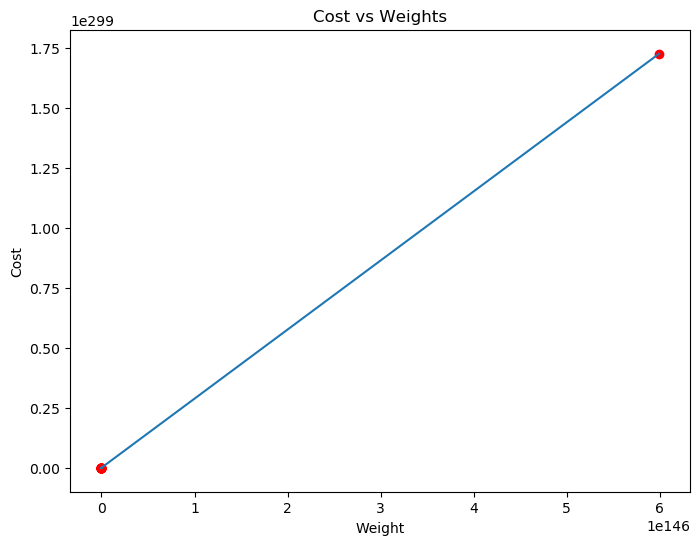

Estimated Weight: nan
Estimated Bias: nan


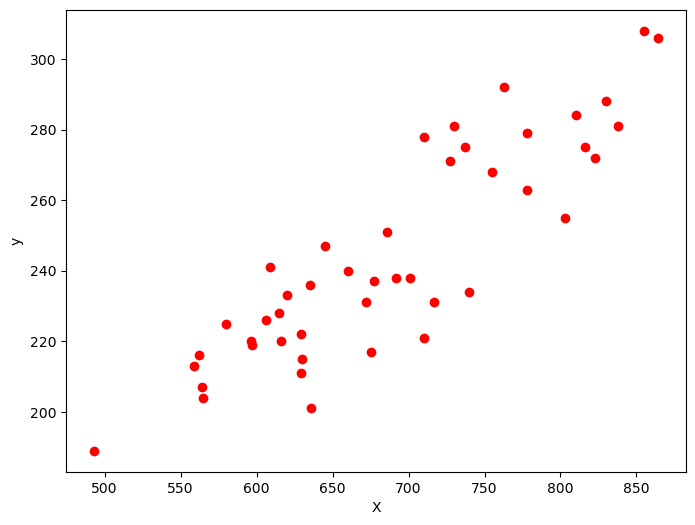

In [76]:
#Setting regressor and outcome vars
X = data_for_model_kangaroo.nasal_length
y = data_for_model_kangaroo.nasal_width
     
 
# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=100)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
# Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias

 
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

--------------------


In [77]:
#Setting regressor and outcome vars
X = data_for_model_kangaroo.nasal_length
y = data_for_model_kangaroo.nasal_width
X = sm.add_constant(X)
     

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [79]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) # Always scale the input. The most convenient way is to use a pipeline.
#sgd = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
sgd.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [90]:
print(sgd)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


In [81]:
#Get predictions from SGD on training and on test data
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd  = sgd.predict(X_test)

In [82]:
y_pred_test_sgd

array([250.17341598, 254.12547475, 203.96472883, 203.6607243 ,
       284.52592683, 203.05271526, 216.42891418, 228.28509049,
       213.38886897, 225.24504528, 182.07640333, 217.34092774,
       213.69287349, 220.68497747, 294.86208053])

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# print('R-square, Training, Linear Regression: ', r2_score(Y_train,Y_pred_train)) #R-Squared from linear regression, on the training data
# print('R-square, Testing, Linear Regression: ', r2_score(Y_test,Y_pred_test)) #R-Squared from linear regression, on the training data
print('R-square, Training, SGD: ', r2_score(Y_train,y_pred_train_sgd)) #R-Squared from SGD, Training
print('R-square, Training, SGD: ', r2_score(Y_test,y_pred_test_sgd)) #R-Squared from SGD, Testing

R-square, Training, SGD:  0.7203123823988404
R-square, Training, SGD:  0.8128544264506912


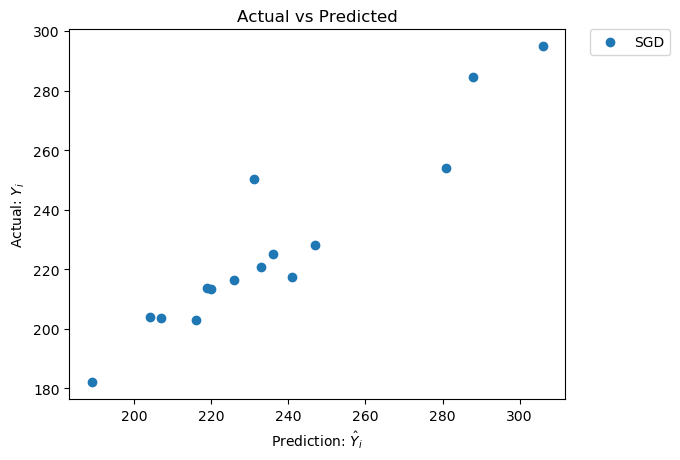

In [84]:
#Plot results from linear model and SGD
# plt.scatter(Y_test, y_pred_test, label='LR')
plt.scatter(Y_test, y_pred_test_sgd, label='SGD')
plt.xlabel("Prediction: $\hat{Y}_i$")
plt.ylabel("Actual: $Y_i$")
plt.title("Actual vs Predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Place a legend to the right of this smaller subplot.
plt.show()

--------------------------------

In [85]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost



In [86]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [87]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

#Setting regressor and outcome vars
X = data_for_model_kangaroo.nasal_length
y = data_for_model_kangaroo.nasal_width
#X = sm.add_constant(X)
     

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

ValueError: Data must be 1-dimensional, got ndarray of shape (45, 45) instead